In [1]:
import main
import pandas as pd
import networkx as nx
from EmergencyUnit import EmergencyUnit

{(6, 3): Text(3, 5, 'Large EU'), (6, 8): Text(8, 5, 'Large EU')}

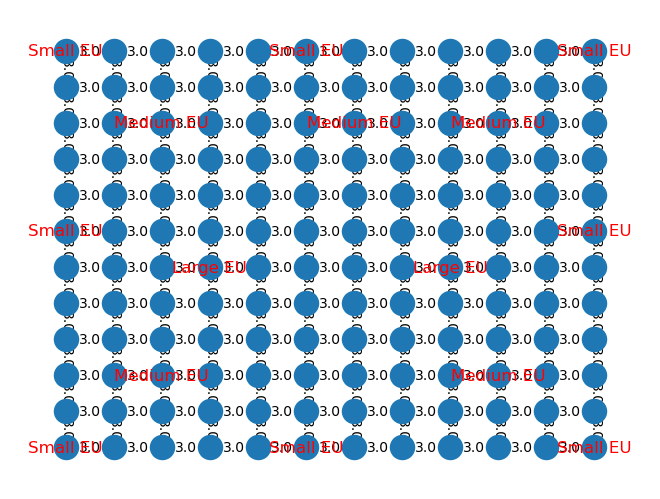

In [2]:
city = main.configure_city_file('./config/configuration_hyp2_sml.txt')
units = EmergencyUnit.response_buildings
small_unit_locs = [unit.location for unit in units if unit.available_capacity==1]
medium_unit_locs = [unit.location for unit in units if unit.available_capacity==3]
large_unit_locs = [unit.location for unit in units if unit.available_capacity==5]

small_emergency_unit_labels = dict()
medium_emergency_unit_labels = dict()
large_emergency_unit_labels = dict()
pos=dict()
node_coordinates=list(city.city_graph.nodes)
width = city.width
height = city.height
dim = city.zone_dimension
for i in range(len(node_coordinates)):
    pos[node_coordinates[i]]=(node_coordinates[i][1], (height*dim-1)-node_coordinates[i][0])
    if node_coordinates[i] in small_unit_locs:
        small_emergency_unit_labels[node_coordinates[i]] = 'Small EU'
    elif node_coordinates[i] in medium_unit_locs:
        medium_emergency_unit_labels[node_coordinates[i]] = 'Medium EU'
    elif node_coordinates[i] in large_unit_locs:
        large_emergency_unit_labels[node_coordinates[i]] = 'Large EU'
traffic_time_labels = nx.get_edge_attributes(city.city_graph,'adjusted_time')
nx.draw(city.city_graph, pos)
nx.draw_networkx_edge_labels(city.city_graph,pos,edge_labels=traffic_time_labels)
nx.draw_networkx_labels(city.city_graph, pos, small_emergency_unit_labels, font_size=12, font_color='r')
nx.draw_networkx_labels(city.city_graph, pos, medium_emergency_unit_labels, font_size=12, font_color='r')
nx.draw_networkx_labels(city.city_graph, pos, large_emergency_unit_labels, font_size=12, font_color='r')

In [3]:
resp_times, successful_perc = main.simulate(city)
# traffic_time_labels = nx.get_edge_attributes(city.city_graph,'adjusted_time')
# nx.draw(city.city_graph, pos)
# nx.draw_networkx_edge_labels(city.city_graph,pos,edge_labels=traffic_time_labels)
# nx.draw_networkx_labels(city.city_graph, pos, emergency_unit_labels, font_size=10, font_color='r')

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [22:07<00:00, 13.27s/it]


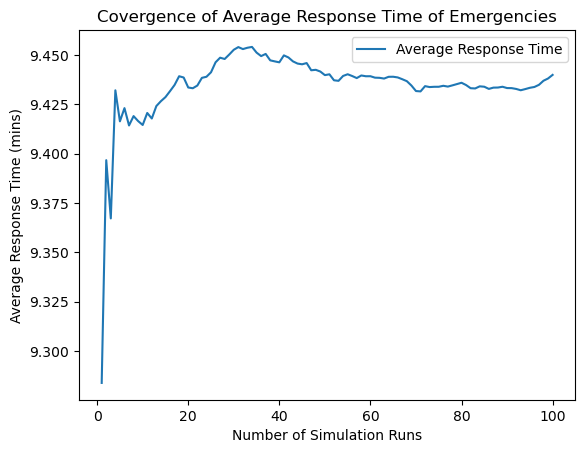

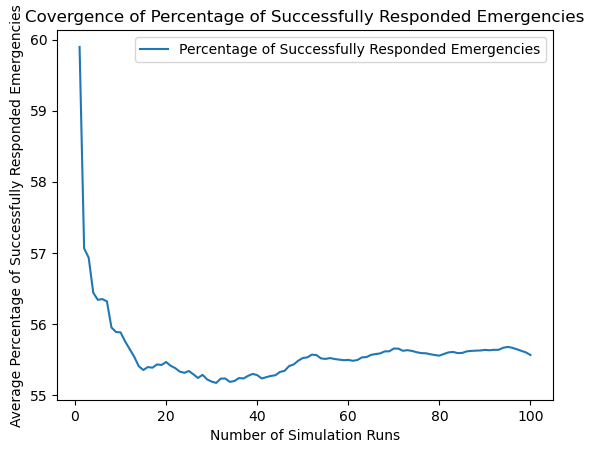

In [9]:
df1 = pd.DataFrame({'Average Response Time': resp_times}, index = [_ for _ in range(1, 101)])
plot1 = df1.plot(title = 'Covergence of Average Response Time of Emergencies')
plot1.set(xlabel='Number of Simulation Runs', ylabel='Average Response Time (mins)')
# plot1.show()
df1.to_csv('hypothesis2_sml_resptime.csv')
df2 = pd.DataFrame({'Percentage of Successfully Responded Emergencies': successful_perc}, index = [_ for _ in range(1, 101)])
plot2 = df2.plot(title = 'Covergence of Percentage of Successfully Responded Emergencies')
plot2.set(xlabel='Number of Simulation Runs', ylabel='Average Percentage of Successfully Responded Emergencies')
# plot2.show()
df2.to_csv('hypothesis2_sml_percsuccessful.csv')

In [10]:
print("Average Response Time: {} mins".format(round(resp_times[-1], 2)))
print("Average Percentage of Successfully Responded Emergencies: {} %".format(round(successful_perc[-1], 2)))

Average Response Time: 9.44 mins
Average Percentage of Successfully Responded Emergencies: 55.56 %
